In [170]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [171]:
#Importing dataset
dataset=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\dataset3-main\dataset3-main\weatherAUS.csv")

In [172]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

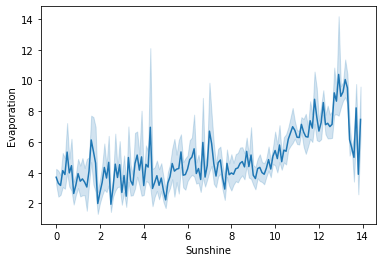

In [211]:
# Sunshine vs Evaporation
sns.lineplot(x='Sunshine',y='Evaporation',data=dataset)

In the above plot Sunshine feature is proportional to the Evaporation feature

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

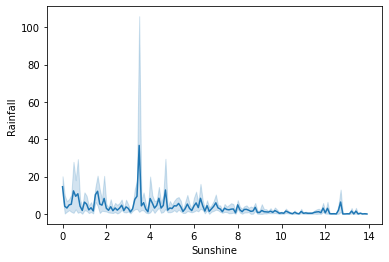

In [212]:
#Sunshine vs Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',data=dataset)

In [173]:
#dividing the dataset into x and y
x=dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y=dataset.iloc[:,-1].values

In [174]:
print(x)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [175]:
print(y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [176]:
y=y.reshape(-1,1)#1d list into 2d list

In [177]:
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


# Dealing with Invalid Dataset

In [178]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x=imputer.fit_transform(x)
y=imputer.fit_transform(y)

In [179]:
print(x)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 19.0 ... 15.0 20.9 'No']]


In [180]:
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


# Encoding Dataset

In [181]:
le1=LabelEncoder()
x[:,0]=le1.fit_transform(x[:,0])
le2=LabelEncoder()
x[:,4]=le2.fit_transform(x[:,4])
le3=LabelEncoder()
x[:,6]=le3.fit_transform(x[:,6])
le4=LabelEncoder()
x[:,7]=le4.fit_transform(x[:,7])
le5=LabelEncoder()
x[:,-1]=le5.fit_transform(x[:,-1])
le6=LabelEncoder()
y=le6.fit_transform(y)

In [182]:
print(x)

[[1 13.4 22.9 ... 16.9 21.8 0]
 [1 7.4 25.1 ... 17.2 24.3 0]
 [1 12.9 25.7 ... 21.0 23.2 0]
 ...
 [9 5.4 26.9 ... 12.5 26.1 0]
 [9 7.8 27.0 ... 15.1 26.0 0]
 [9 14.9 19.0 ... 15.0 20.9 0]]


In [183]:
print(y)

[0 0 0 ... 0 0 0]


# Feature Scaling

In [184]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [185]:
print(x)

[[-1.51577598  0.04039106 -0.15101108 ... -0.15006358 -0.10175254
  -0.55609919]
 [-1.51577598 -1.07478085  0.20800875 ... -0.09661746  0.318031
  -0.55609919]
 [-1.51577598 -0.05253993  0.30592325 ...  0.58036664  0.13332624
  -0.55609919]
 ...
 [ 1.01389522 -1.44650482  0.50175225 ... -0.93393991  0.62027515
  -0.55609919]
 [ 1.01389522 -1.00043606  0.51807133 ... -0.47074026  0.60348381
  -0.55609919]
 [ 1.01389522  0.31918404 -0.78745533 ... -0.48855563 -0.25287462
  -0.55609919]]


# Splitting Dataset into Training and Test set

In [186]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

# Model Building 'Predict whether or not it will rain tomarrow'

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [188]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [189]:
print("lr classification score", lr.score(x_train, y_train))
print("dt classification score", dt.score(x_train, y_train))
print("rf classification score", rf.score(x_train, y_train))
print("adb classification score", adb.score(x_train, y_train))

lr classification score 0.827893175074184
dt classification score 0.9998516320474777
rf classification score 0.9998516320474777
adb classification score 0.8345697329376854


# Model Evaluation

In [190]:
lr_ypred=lr.predict(x_test)
dt_ypred=dt.predict(x_test)
rf_ypred=rf.predict(x_test)
adb_ypred=adb.predict(x_test)

In [191]:
#Using confusion matrix in order to evaluate model accuracy
lr_conf_mat=confusion_matrix(y_test, lr_ypred)
print(lr_conf_mat)

[[1201   85]
 [ 185  214]]


In [192]:
dt_conf_mat=confusion_matrix(y_test, dt_ypred)
print(dt_conf_mat)

[[1146  140]
 [ 125  274]]


In [193]:
rf_conf_mat=confusion_matrix(y_test, rf_ypred)
print(rf_conf_mat)

[[1236   50]
 [ 117  282]]


In [194]:
adb_conf_mat=confusion_matrix(y_test, adb_ypred)
print(adb_conf_mat)

[[1202   84]
 [ 190  209]]


# Checking Classification report for each model

In [195]:
lr_report=classification_report(y_test, lr_ypred)
print(lr_report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1286
           1       0.72      0.54      0.61       399

    accuracy                           0.84      1685
   macro avg       0.79      0.74      0.76      1685
weighted avg       0.83      0.84      0.83      1685



In [196]:
dt_report=classification_report(y_test, dt_ypred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1286
           1       0.66      0.69      0.67       399

    accuracy                           0.84      1685
   macro avg       0.78      0.79      0.79      1685
weighted avg       0.84      0.84      0.84      1685



In [197]:
rf_report=classification_report(y_test, rf_ypred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1286
           1       0.85      0.71      0.77       399

    accuracy                           0.90      1685
   macro avg       0.88      0.83      0.85      1685
weighted avg       0.90      0.90      0.90      1685



In [198]:
adb_report=classification_report(y_test, adb_ypred)
print(adb_report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1286
           1       0.71      0.52      0.60       399

    accuracy                           0.84      1685
   macro avg       0.79      0.73      0.75      1685
weighted avg       0.83      0.84      0.83      1685



# ROC AUC Curve:

In [199]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(roc_auc_score(y_test, lr.predict(x_test)))
print(roc_auc_score(y_test, dt.predict(x_test)))
print(roc_auc_score(y_test, rf.predict(x_test)))
print(roc_auc_score(y_test, adb.predict(x_test)))

0.7351222145566093
0.7889260476229454
0.8339433342298201
0.7292453528845442


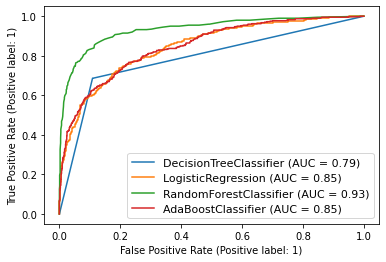

In [200]:
# let's find the roc curve to check the best fitted model
disp=plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(adb, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')

As per above observation we can see RandomForestClassifier give the best score.

# K-Fold Cross Validation

In [201]:
from sklearn.model_selection import KFold, cross_val_score
k_f=KFold(n_splits=4, shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [202]:
print("Mean of Cross Validation Score for Random Forest model", "=>", cross_val_score(rf, x, y, cv=5).mean())

Mean of Cross Validation Score for Random Forest model => 0.8548367952522256


# Hyperparameter Tuning

In [203]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=10, stop=80, num=10)]
# Number of features to consider at every split
max_features=['auto', 'sqrt']
# Maximum number of levels in tree
max_depth=[2,4]
# Minimum number of samples required to split a node
min_samples_split=[2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1, 2]
# Method of selecting samples for training each tree
bootstrap=[True, False]

In [204]:
# Create the param grid
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [205]:
rf_model=RandomForestClassifier()

In [206]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=4 )

In [207]:
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [208]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 25}

# Check Accuracy

In [209]:
print(f'Train Accuracy-:{rf_grid.score(x_train, y_train):.3f}')
print(f'Test Accuracy-:{rf_grid.score(x_test, y_test):.3f}')

Train Accuracy-:0.832
Test Accuracy-:0.839


# Saving Model

In [36]:
rf=RandomForestClassifier()
rf.fit(x, y)

RandomForestClassifier()

In [37]:
import joblib

In [38]:
joblib.dump(rf, 'model_joblib_rf')

['model_joblib_rf']

In [39]:
model=joblib.load('model_joblib_rf')

# Predict how much rainfall could be there

In [100]:
# divide the dataset into x and y
x=dataset.iloc[:,[1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
y=dataset.iloc[:,4].values

In [101]:
print(x)

[['Albury' 13.4 22.9 ... 21.8 'No' 'No']
 ['Albury' 7.4 25.1 ... 24.3 'No' 'No']
 ['Albury' 12.9 25.7 ... 23.2 'No' 'No']
 ...
 ['Uluru' 5.4 26.9 ... 26.1 'No' 'No']
 ['Uluru' 7.8 27.0 ... 26.0 'No' 'No']
 ['Uluru' 14.9 nan ... 20.9 'No' nan]]


In [102]:
print(y)

[0.6 0.  0.  ... 0.  0.  0. ]


In [103]:
y=y.reshape(-1,1)#1d list into 2d list

In [104]:
print(y)

[[0.6]
 [0. ]
 [0. ]
 ...
 [0. ]
 [0. ]
 [0. ]]


# Dealing with Invalid Dataset

In [105]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x=imputer.fit_transform(x)
y=imputer.fit_transform(y)

In [106]:
print(x)

[['Albury' 13.4 22.9 ... 21.8 'No' 'No']
 ['Albury' 7.4 25.1 ... 24.3 'No' 'No']
 ['Albury' 12.9 25.7 ... 23.2 'No' 'No']
 ...
 ['Uluru' 5.4 26.9 ... 26.1 'No' 'No']
 ['Uluru' 7.8 27.0 ... 26.0 'No' 'No']
 ['Uluru' 14.9 19.0 ... 20.9 'No' 'No']]


In [107]:
print(y)

[[0.6]
 [0. ]
 [0. ]
 ...
 [0. ]
 [0. ]
 [0. ]]


# Encoding Dataset

In [108]:
le1=LabelEncoder()
x[:,0]=le1.fit_transform(x[:,0])
le2=LabelEncoder()
x[:,3]=le2.fit_transform(x[:,3])
le3=LabelEncoder()
x[:,5]=le3.fit_transform(x[:,5])
le4=LabelEncoder()
x[:,6]=le4.fit_transform(x[:,6])
le5=LabelEncoder()
x[:,-2]=le5.fit_transform(x[:,-2])
le6=LabelEncoder()
x[:,-1]=le6.fit_transform(x[:,-1])

In [109]:
print(x)

[[1 13.4 22.9 ... 21.8 0 0]
 [1 7.4 25.1 ... 24.3 0 0]
 [1 12.9 25.7 ... 23.2 0 0]
 ...
 [9 5.4 26.9 ... 26.1 0 0]
 [9 7.8 27.0 ... 26.0 0 0]
 [9 14.9 19.0 ... 20.9 0 0]]


# Feature Scaling

In [134]:
sc=StandardScaler()
x=sc.fit_transform(x)
y=sc.fit_transform(y)

In [135]:
print(x)

[[-1.51577598  0.04039106 -0.15101108 ... -0.10175254 -0.55609919
  -0.55628212]
 [-1.51577598 -1.07478085  0.20800875 ...  0.318031   -0.55609919
  -0.55628212]
 [-1.51577598 -0.05253993  0.30592325 ...  0.13332624 -0.55609919
  -0.55628212]
 ...
 [ 1.01389522 -1.44650482  0.50175225 ...  0.62027515 -0.55609919
  -0.55628212]
 [ 1.01389522 -1.00043606  0.51807133 ...  0.60348381 -0.55609919
  -0.55628212]
 [ 1.01389522  0.31918404 -0.78745533 ... -0.25287462 -0.55609919
  -0.55628212]]


In [136]:
print(y)

[[-0.20602081]
 [-0.26416452]
 [-0.26416452]
 ...
 [-0.26416452]
 [-0.26416452]
 [-0.26416452]]


# Splitting dataset into train and test set

In [137]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

# Model Building

In [138]:
# Import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
#Model Training
lr=LinearRegression()
lr.fit(x_train, y_train)
svm=SVR()
svm.fit(x_train, y_train)
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train, y_train)

GradientBoostingRegressor()

In [140]:
# Prediction on test data
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [141]:
y_pred2=y_pred2.reshape(-1,1)

In [142]:
y_pred3=y_pred3.reshape(-1,1)

In [143]:
y_pred4=y_pred4.reshape(-1,1)

In [144]:
y_pred1=y_pred1.reshape(-1,1)

In [145]:
y_test=y_test.reshape(-1,1)

In [146]:
print(y_test)

[[-0.26416452]
 [-0.26416452]
 [-0.26416452]
 ...
 [ 0.10407896]
 [ 1.26695311]
 [-0.26416452]]


In [147]:
print(y_pred1)

[[-0.15814784]
 [-0.05926589]
 [-0.32742284]
 ...
 [ 0.81073546]
 [ 0.67100206]
 [-0.23044612]]


In [148]:
print(y_pred2)

[[-0.36843209]
 [-0.20716659]
 [-0.30724642]
 ...
 [ 0.54499076]
 [ 0.03542014]
 [-0.27503241]]


In [149]:
print(y_pred3)

[[-0.24071322]
 [-0.25776871]
 [-0.26290474]
 ...
 [ 0.63115167]
 [ 0.48249759]
 [-0.26416452]]


In [150]:
print(y_pred4)

[[-0.15229619]
 [-0.2409277 ]
 [-0.24519632]
 ...
 [ 0.54958637]
 [ 0.73121531]
 [-0.28302457]]


# Evaluating the Algorithm

In [151]:
from sklearn import metrics

In [152]:
score1=metrics.r2_score(y_test, y_pred1)
score2=metrics.r2_score(y_test, y_pred2)
score3=metrics.r2_score(y_test, y_pred3)
score4=metrics.r2_score(y_test, y_pred4)

In [153]:
print(score1, score2, score3, score4)

0.29813673391407725 0.3209568236143817 0.39812889861255596 0.3649407762621135


Here we can see RandomForest give the best score

In [154]:
s1=metrics.mean_absolute_error(y_test, y_pred1)
s2=metrics.mean_absolute_error(y_test, y_pred2)
s3=metrics.mean_absolute_error(y_test, y_pred3)
s4=metrics.mean_absolute_error(y_test, y_pred4)

In [155]:
print(s1, s2, s3, s4)

0.3101574191197231 0.2244973385246052 0.20199095198430214 0.2521202562495561


In [160]:
# Save Model Using joblib
rf=RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [161]:
import joblib

In [162]:
joblib.dump(rf, 'model_joblib_rf')

['model_joblib_rf']

In [163]:
model=joblib.load('model_joblib_rf')